In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_empleados =  pd.read_csv("recursos_humanos.csv")
df_empleados.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Se revisan los departamentos que hay en la columna de ventas.

In [4]:
df_empleados.value_counts("sales")

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

Se coniverten los datos por departamento a binario, y se revisa la informacion de los datos.

In [5]:
df_empleados_dummy = pd.get_dummies(df_empleados)
df_empleados_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_IT               14999 non-null  bool   
 9   sales_RandD            14999 non-null  bool   
 10  sales_accounting       14999 non-null  bool   
 11  sales_hr               14999 non-null  bool   
 12  sales_management       14999 non-null  bool   
 13  sales_marketing        14999 non-null  bool   
 14  sales_product_mng      14999 non-null  bool   
 15  sa

In [6]:
df_empleados_dummy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


Se selecciona desde la columna 8 a la ultima y se aplica el cambio a 1 si es del departamento y a 0 si no es del departamento.

In [7]:
for columna in df_empleados_dummy.iloc[:, 8:]:
    df_empleados_dummy[columna] = df_empleados_dummy[columna].apply(lambda x: 1 if x else 0)

df_empleados_dummy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Creamos las variables x(independiente) y y(dependiente)

In [ ]:
VariableIndependiente = df_empleados_dummy.drop(["left"], axis=1)
VariableDependiente = df_empleados_dummy["left"]
VariableDependiente.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [9]:
VariableIndependiente.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

Despues de importar el modelo knn o neighbors classifier se procede a partir los datos en entrenamiento, test y normalizarlos con la herramienta de StandardScaler() 

El uso de fit_transform en x_train permite que el scaler "aprenda" de los datos de entrenamiento. Esto significa que calcula la media y la desviación estándar únicamente a partir de X_train.

Luego, transforma x_train utilizando esos parámetros. Esto asegura que el modelo entrena sobre datos que han sido escalados adecuadamente sin usar información futura.

Cuando usas transform en x_test, aplicas la misma transformación a los datos de prueba utilizando los parámetros (media y desviación estándar) calculados a partir de X_train.

Esto asegura que el modelo evaluará los datos de prueba de la misma manera que fue entrenado, sin tener acceso a información del conjunto de prueba durante el entrenamiento. Esto es crucial para evitar la fuga de datos.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(VariableIndependiente, VariableDependiente, test_size=0.2, random_state=1)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_test[:1])

[[ 0.22795339 -1.901743   -1.45439793  0.11956725  2.40131103 -0.41072597
  -0.14676255 -0.30152505 -0.23500683 -0.23103132 -0.22598379 -0.21090566
  -0.24719867 -0.25078493  1.61481788 -0.41831831 -0.46788361 -0.29756031
  -0.97164932  1.14423615]]


Efectivamente son 20 datos de las 20 columnas en el entrenamiento

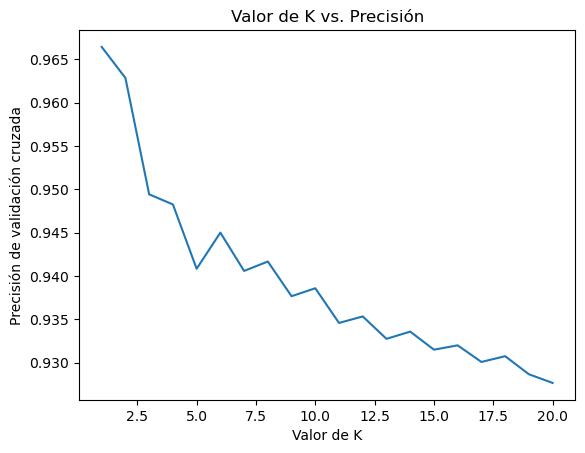

1

In [12]:
k_rango = range(1, 21)
k_puntuacion = []

for k in k_rango:
    knn = KNeighborsClassifier(n_neighbors=k)
    puntos = cross_val_score(knn, x_train, y_train, cv=20, scoring='accuracy')
    k_puntuacion.append(puntos.mean())

# Visualización de resultados
plt.plot(k_rango, k_puntuacion)
plt.xlabel('Valor de K')
plt.ylabel('Precisión de validación cruzada')
plt.title('Valor de K vs. Precisión')
plt.show()

k_optimo = k_rango[k_puntuacion.index(max(k_puntuacion))]
k_optimo

Se hacen pruebas de puntuacion en el rango de 1 a 20 de K para saber cual es el k mas efectivo u optimo para el modelo, se saca la media para tener una estimacion mas precisa.

In [13]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train, y_train)

y_pred= KNN.predict(x_test)
print("Puntuacion : %.5f" %KNN.score(x_test, y_test))

# Calcular la puntuación F1
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Puntuación F1: {f1:.5f}')

Puntuacion : 0.96500
Puntuación F1: 0.96538


Confusion Matrix : 


Text(50.722222222222214, 0.5, 'Y Verdadera')

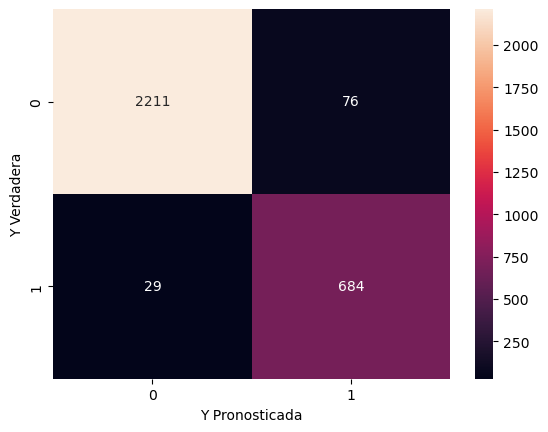

In [14]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

print("Confusion Matrix : ")
cm_empleados=confusion_matrix(y_test, y_pred)
sns.heatmap(cm_empleados, annot=True , fmt= ".0f")
plt.xlabel("Y Pronosticada")
plt.ylabel("Y Verdadera")

In [15]:
correctos = cm_empleados[1,1] + cm_empleados[0,0]
incorrectos = cm_empleados[0,1] + cm_empleados[1,0]

PrecisionGlobal = correctos /  (correctos +  incorrectos)
PrecisionRetiro = cm_empleados[1,1] /  (cm_empleados[1,1] +  cm_empleados[0,1])
PrecisionNoRetiro = cm_empleados[0,0] /  (cm_empleados[0,0] +  cm_empleados[1,0])

print(f"Precision de global: {PrecisionGlobal:.2f}")
print(f"Precision de empleados que se retiran: {PrecisionRetiro:.2f}")
print(f"Precision de empleados que NO se retiran: {PrecisionNoRetiro:.2f}")

Precision de global: 0.96
Precision de empleados que se retiran: 0.90
Precision de empleados que NO se retiran: 0.99


Se obtiene la precision del modelo para saber si los empleados se retiran de la empresa, dando un 90% de precision. 

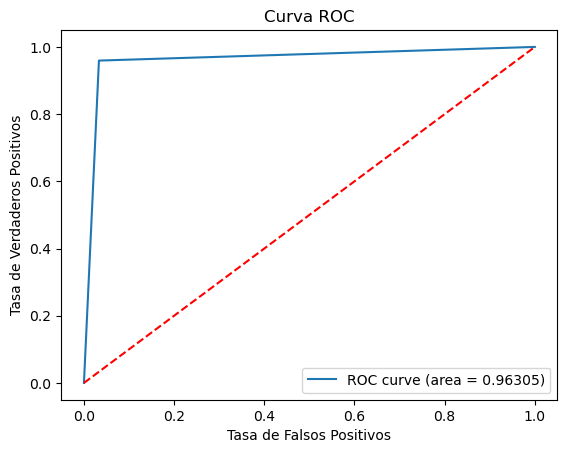

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Determinamos que nuestro modelo y su capacidad de discriminar tiene una precision del area bajo la curva del 96.3% esto quiere decir que nuestro modelo puede ayudarnos a predecir que empleados son susceptibles a retirarse de la compañia 

In [17]:
EmpleadosRetiro = df_empleados_dummy[df_empleados_dummy["left"]==1]

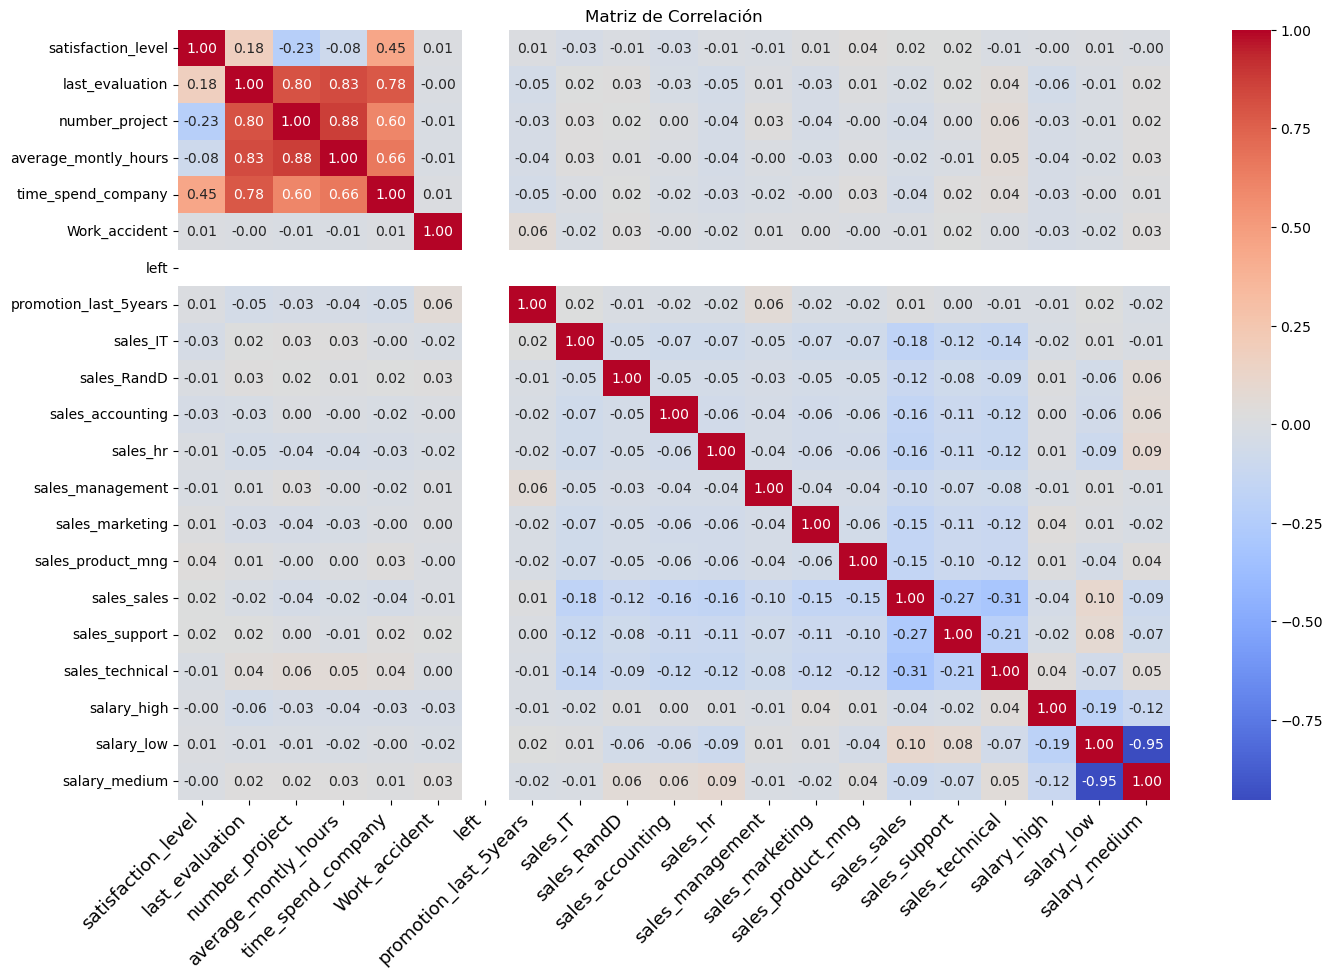

In [23]:
plt.figure(figsize=(16, 10))
sns.heatmap(EmpleadosRetiro.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.xticks(rotation=45, ha='right', fontsize=13) 
plt.show()

Y este grafico es exploratorio para saber que tienen en comun las personas que se retiran de la empresa, lo cual nos dice el proyecto, numero de horas, tiempo en la firma son de los mas correlacinados y tambien un poco de los departamentos que tienen coeficinetes pocitivos y cuales son negativos.